In [5]:
pip install tensorflow keras matplotlib imutils opencv-python pillow

  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 15.0 MB/s eta 0:00:00m eta 0:00:010:01:01
Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 6.4 MB/s eta 0:00:006 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 80.4 MB/s eta 0:00:00m eta 0:00:010:01m01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 37.8 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 79.3 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 66.5 MB/s eta 0:00:000:00:01
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.7.0
    Uninstalling h5py-3.7.0:
      Successfully uninstalled h5py-3.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.0
    Uninstalling tensorboard-2.14.0:
      Successfully uninstalled tensorboard-2.14.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import necessary libraries
import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import imutils
import cv2
import PIL.Image
import os

# Use inline mode for matplotlib
%matplotlib inline

# Define data_generator
demo_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)

In [2]:
#Make folder
def mkdir():
    os.mkdir('testFolder')
    
    os.mkdir('testFolder_output')
mkdir()

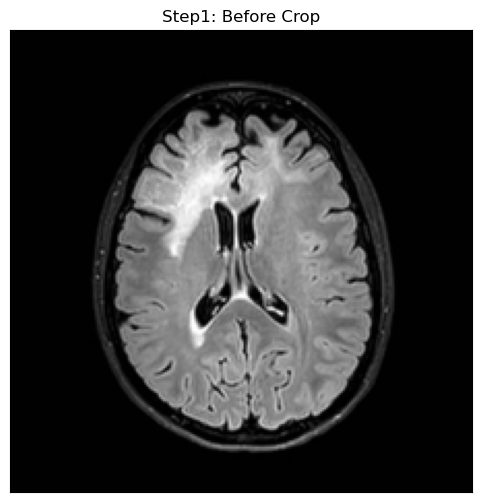

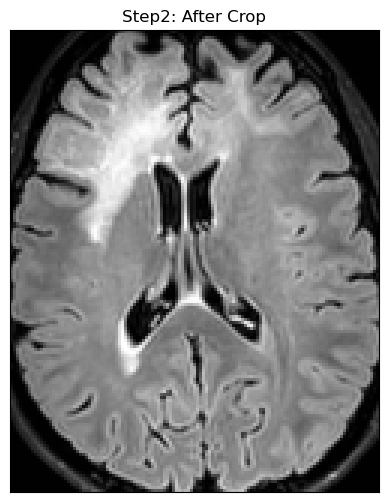

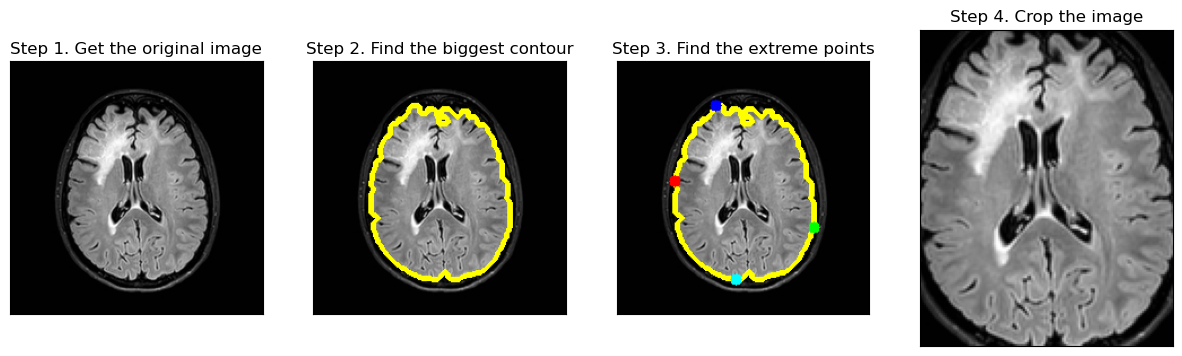

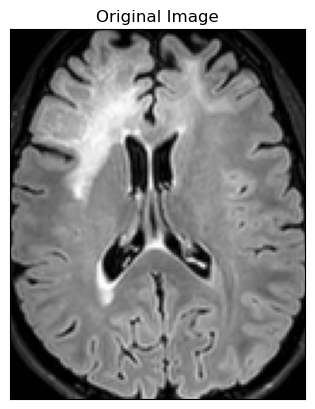

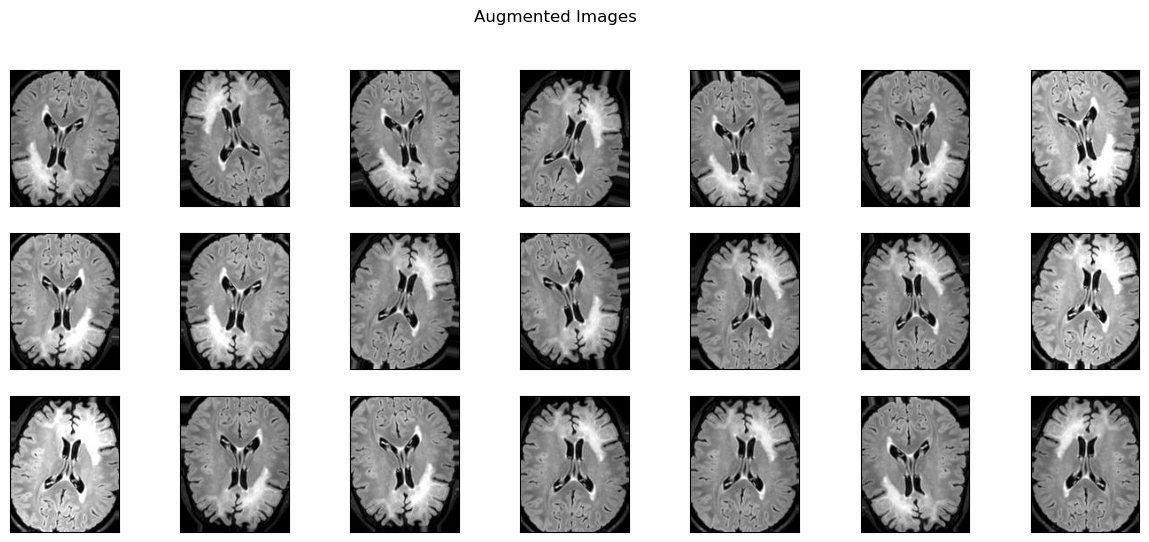

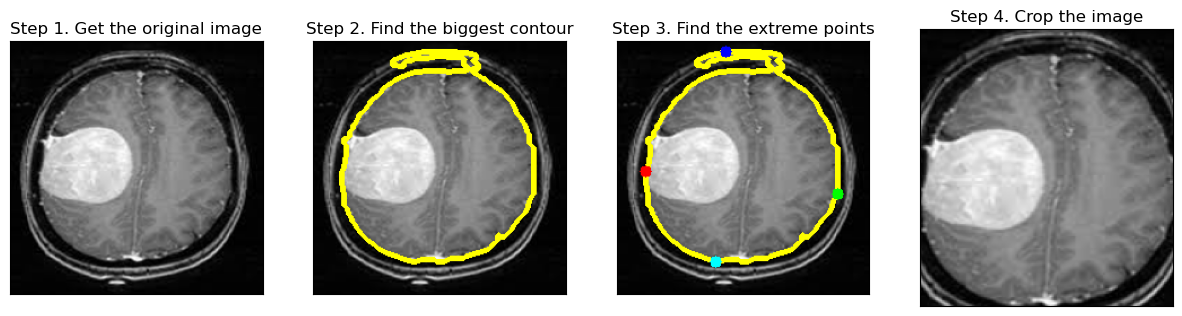

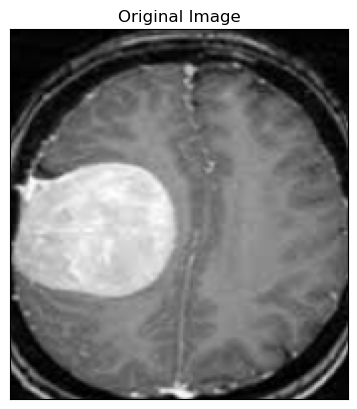

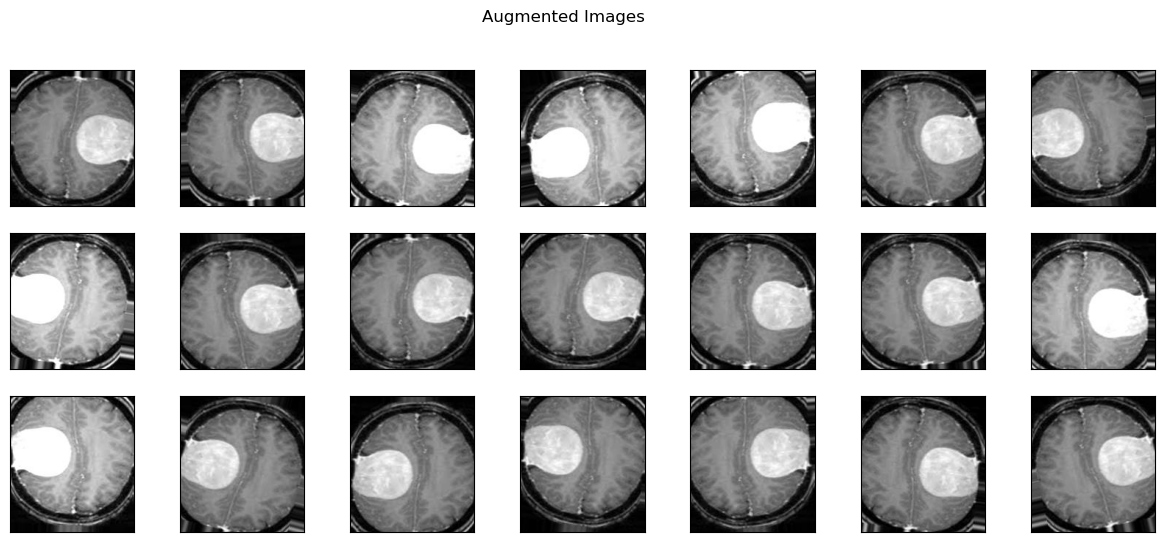

In [3]:
def cropAndAugmentation():
    # Augmentation Code
    flag1 = 0
    flag2 = 0
    j = 0
    IMG_SIZE = 224
    dim = (IMG_SIZE, IMG_SIZE)
    
    # Directories for tumors and non-tumors
    input_directories = {
        'no': 'Example_Tumor/no',
        'yes': 'Example_Tumor/yes'
    }
    
    output_directories = {
        'no': 'Example_tumor_output/no',
        'yes': 'Example_tumor_output/yes'
    }
    
    # Create output directories if they do not exist
    for output_directory in output_directories.values():
        if not os.path.exists(output_directory):
            os.makedirs(output_directory)
    
    demo_datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.05,
        height_shift_range=0.05,
        rescale=1./255,
        shear_range=0.05,
        brightness_range=[0.1, 1.5],
        horizontal_flip=True,
        vertical_flip=True
    )

    for label, input_directory in input_directories.items():
        output_directory = output_directories[label]
        
        for img in os.listdir(input_directory):
            image = cv2.imread(os.path.join(input_directory, img))
            image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
            gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
            gray = cv2.GaussianBlur(gray, (5, 5), 0)
            
            # Print original image
            if flag1 == 0:
                plt.figure(figsize=(15, 6))
                plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                plt.xticks([])
                plt.yticks([])
                plt.title('Step1: Before Crop')
                plt.show()
                flag1 = 1
            
            # CROP
            thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
            thresh = cv2.erode(thresh, None, iterations=2)
            thresh = cv2.dilate(thresh, None, iterations=2)
            
            # Find contours in thresholded image, then grab the largest one
            cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cnts = imutils.grab_contours(cnts)
            c = max(cnts, key=cv2.contourArea)
            
            # Find the extreme points of data
            extLeft = tuple(c[c[:, :, 0].argmin()][0])
            extRight = tuple(c[c[:, :, 0].argmax()][0])
            extTop = tuple(c[c[:, :, 1].argmin()][0])
            extBot = tuple(c[c[:, :, 1].argmax()][0])
            
            # Adding contour on the image
            img_cnt = cv2.drawContours(image.copy(), [c], -1, (0, 255, 255), 4)
            
            # Add extreme points
            img_pnt = cv2.circle(img_cnt.copy(), extLeft, 5, (0, 0, 255), -1)
            img_pnt = cv2.circle(img_pnt, extRight, 5, (0, 255, 0), -1)
            img_pnt = cv2.circle(img_pnt, extTop, 5, (255, 0, 0), -1)
            img_pnt = cv2.circle(img_pnt, extBot, 5, (255, 255, 0), -1)
            
            # Apply crop to the image
            ADD_PIXELS = 0
            new_image = image[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
            
            # Print after crop
            if flag2 == 0:
                plt.figure(figsize=(15, 6))
                plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
                plt.xticks([])
                plt.yticks([])
                plt.title('Step2: After Crop')
                plt.show()
                flag2 = 1
            
            # Display crops
            plt.figure(figsize=(15, 6))
            plt.subplot(141)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.xticks([])
            plt.yticks([])
            plt.title('Step 1. Get the original image')
            
            plt.subplot(142)
            plt.imshow(cv2.cvtColor(img_cnt, cv2.COLOR_BGR2RGB))
            plt.xticks([])
            plt.yticks([])
            plt.title('Step 2. Find the biggest contour')
            
            plt.subplot(143)
            plt.imshow(cv2.cvtColor(img_pnt, cv2.COLOR_BGR2RGB))
            plt.xticks([])
            plt.yticks([])
            plt.title('Step 3. Find the extreme points')
            
            plt.subplot(144)
            plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
            plt.xticks([])
            plt.yticks([])
            plt.title('Step 4. Crop the image')
            plt.show()
            
            # Augmentation
            x = new_image
            x = x.reshape((1,) + x.shape)
            i = 0
            for batch in demo_datagen.flow(x, batch_size=1, save_to_dir=output_directory, save_prefix='{}_c_{:02d}'.format(label, j), save_format='jpg'):
                i += 1
                if i > 20:
                    break
                j += 1
            
            plt.imshow(x[0])
            plt.xticks([])
            plt.yticks([])
            plt.title('Original Image')
            plt.show()
            
            plt.figure(figsize=(15, 6))
            i = 1
            for img in os.listdir(output_directory):
                img = cv2.imread(os.path.join(output_directory, img))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                plt.subplot(3, 7, i)
                plt.imshow(img)
                plt.xticks([]) 
                plt.yticks([])
                i += 1
                if i > 3 * 7:
                    break
            plt.suptitle('Augmented Images')
            plt.show()

# Run the function
cropAndAugmentation()